# Ipl 2021-2022 auction DA_project

In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required csv file
ipl=pd.read_csv("ipl_2022_dataset.csv")

In [3]:
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [4]:
ipl.shape

(633, 8)

In [6]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [ ]:
#Removing the unnecessary columns
ipl.drop('Unnamed: 0',axis=1,inplace=True)
#Columns already removed 

In [10]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [11]:
#Checking the null values
ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [12]:
#Taking care of the null values
ipl[ipl['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [13]:
ipl['Cost IN $ (000)']=ipl['Cost IN $ (000)'].fillna(0)
ipl['COST IN ₹ (CR.)']=ipl['COST IN ₹ (CR.)'].fillna(0)

In [14]:
ipl[ipl['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [15]:
ipl['2021 Squad']=ipl['2021 Squad'].fillna('Not Participated')

In [16]:
ipl[ipl['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team


In [17]:
ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [18]:
#Hence all the columns having null values are taken care of

In [19]:
#Creating a new column for sold and unsold players named status
teams=ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [20]:
ipl['Status']=ipl['Team'].replace(teams,'Sold')
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold


In [22]:
#checking player with duplicate or same names
ipl[ipl['Player'].duplicated(keep= False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,Sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold


In [23]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold


In [24]:
#Treating the base price column and creating a new column retention for further analysis

ipl['retention'] = ipl['Base Price']
ipl['retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh','1.5 Cr'],'In Auction', inplace = True)

In [25]:
ipl['Base Price'].replace('Draft Pick',0, inplace = True)
ipl['base_price_unit'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[-1])
ipl['base_price'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[0])
ipl['base_price'].replace('Retained',0,inplace=True)
ipl['base_price_unit'].unique()

array(['0', 'Cr', 'Lakh', 'Retained'], dtype=object)

In [26]:
ipl['base_price_unit'] = ipl['base_price_unit'].replace({'Cr':100,'Lakh':1,'Retained':0})
ipl['base_price'] = ipl['base_price'].astype(float)
ipl['base_price_unit'] = ipl['base_price_unit'].astype(int)
ipl['base_price'] = ipl['base_price']*ipl['base_price_unit']
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick,0,0.0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick,0,0.0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,In Auction,100,200.0
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,In Auction,1,40.0
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick,0,0.0


In [27]:
#Renaming some columns in more understandable format
ipl.replace({'SRH':'Sunrisers Hyderabad','CSK':'Chennai Super Kings','MI':'Mumbai Indians','KKR':'Kolkata Knight Riders','RR':'Rajasthan Royals','PBKS':'Punjab Kings','DC':'Delhi Capitals','RCB':'Royal Challengers Bangalore'},inplace =True)

In [29]:
ipl['COST IN ₹ (CR.)'] = ipl['COST IN ₹ (CR.)']*100
ipl = ipl.rename(columns={'TYPE':'Type','COST IN ₹ (CR.)':'Sold_for_lakh','Cost IN $ (000)':'Cost_in_dollars','2021 Squad':'Prev_team','Team':'Curr_team'})

In [30]:
ipl.head()

,Player,Base Price,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,Status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,1500.0,1950.0,Sunrisers Hyderabad,Gujarat Titans,Sold,Draft Pick,0,0.0
1,Hardik Pandya,0,ALL-ROUNDER,1500.0,1950.0,Mumbai Indians,Gujarat Titans,Sold,Draft Pick,0,0.0
2,Lockie Ferguson,2 Cr,BOWLER,1000.0,1300.0,Kolkata Knight Riders,Gujarat Titans,Sold,In Auction,100,200.0
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,900.0,1170.0,Rajasthan Royals,Gujarat Titans,Sold,In Auction,1,40.0
4,Shubman Gill,0,BATTER,800.0,1040.0,Kolkata Knight Riders,Gujarat Titans,Sold,Draft Pick,0,0.0


In [31]:
# Above is the complete data which can be used for analysis 
# However we will remove some columns as they are now required for visualization purpose right now


In [ ]:
ipl.drop('base_price_unit',axis=1,inplace=True) #Already removed

In [34]:
ipl.drop('base_price',axis=1,inplace=True)

In [35]:
ipl.head()

,Player,Base Price,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,Status,retention
0,Rashid Khan,0,BOWLER,1500.0,1950.0,Sunrisers Hyderabad,Gujarat Titans,Sold,Draft Pick
1,Hardik Pandya,0,ALL-ROUNDER,1500.0,1950.0,Mumbai Indians,Gujarat Titans,Sold,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,1000.0,1300.0,Kolkata Knight Riders,Gujarat Titans,Sold,In Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,900.0,1170.0,Rajasthan Royals,Gujarat Titans,Sold,In Auction
4,Shubman Gill,0,BATTER,800.0,1040.0,Kolkata Knight Riders,Gujarat Titans,Sold,Draft Pick


# Answering some Analytical questions

In [36]:
# How many players participated in 2022 auction?
ipl.shape[0]

633

In [38]:
# How many types of players participated in ipl 2022
types=ipl['Type'].value_counts()
types.reset_index()

,index,Type
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

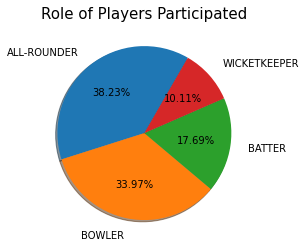

In [39]:
plt.pie(types.values, labels=types.index,labeldistance=1.2,autopct='%1.2f%%',shadow=True,startangle=60)
plt.title('Role of Players Participated', fontsize = 15)
plt.plot()


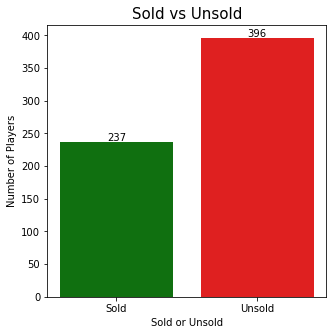

In [41]:
# Number of sold unsold players
plt.figure(figsize=(5,5))
fig = sns.countplot(ipl['Status'],palette=['Green','Red'])
plt.xlabel('Sold or Unsold')
plt.ylabel('Number of Players')
plt.title('Sold vs Unsold', fontsize=15)
plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')

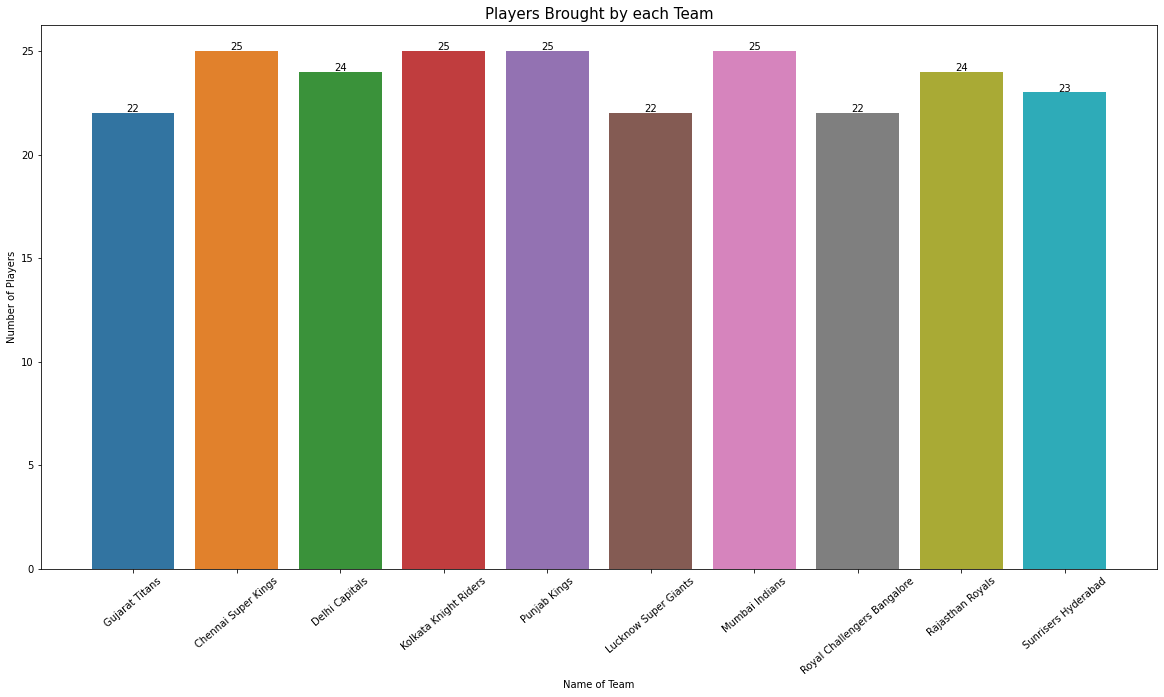

In [43]:
#How many players bought by each team
plt.figure(figsize=(20,10))
fig = sns.countplot(ipl[ipl['Curr_team']!='Unsold']['Curr_team'])
plt.xlabel('Name of Team')
plt.ylabel('Number of Players')
plt.title('Players Brought by each Team', fontsize=15)
plt.xticks(rotation=40)
plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')

In [44]:
# Which Are the players who participated in IPL 2021 and will be participating in IPL 2022 and playing in same team


ipl.replace({'SRH':'Sunrisers Hyderabad','CSK':'Chennai Super Kings','MI':'Mumbai Indians','KKR':'Kolkata Knight Riders','RR':'Rajasthan Royals','PBKS':'Punjab Kings','DC':'Delhi Capitals','RCB':'Royal Challengers Bangalore'},inplace =True)

In [45]:
same_team = ipl[(ipl['Curr_team']==ipl['Prev_team']) & (ipl['retention']=='In Auction')]
same_team

,Player,Base Price,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,Status,retention
23,Deepak Chahar,2 Cr,BOWLER,1400.0,1820.0,Chennai Super Kings,Chennai Super Kings,Sold,In Auction
26,Ambati Rayudu,2 Cr,WICKETKEEPER,675.0,877.5,Chennai Super Kings,Chennai Super Kings,Sold,In Auction
28,Dwayne Bravo,2 Cr,ALL-ROUNDER,440.0,572.0,Chennai Super Kings,Chennai Super Kings,Sold,In Auction
31,Robin Uthappa,2 Cr,BATTER,200.0,260.0,Chennai Super Kings,Chennai Super Kings,Sold,In Auction
32,Mitchell Santner,1 Cr,ALL-ROUNDER,190.0,247.0,Chennai Super Kings,Chennai Super Kings,Sold,In Auction
39,K.Bhagath Varma,20 Lakh,ALL-ROUNDER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,Sold,In Auction
41,N. Jagadeesan,20 Lakh,WICKETKEEPER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,Sold,In Auction
42,C.Hari Nishaanth,20 Lakh,BATTER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,Sold,In Auction
43,K.M. Asif,20 Lakh,BOWLER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,Sold,In Auction
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,65.0,84.5,Delhi Capitals,Delhi Capitals,Sold,In Auction


[]

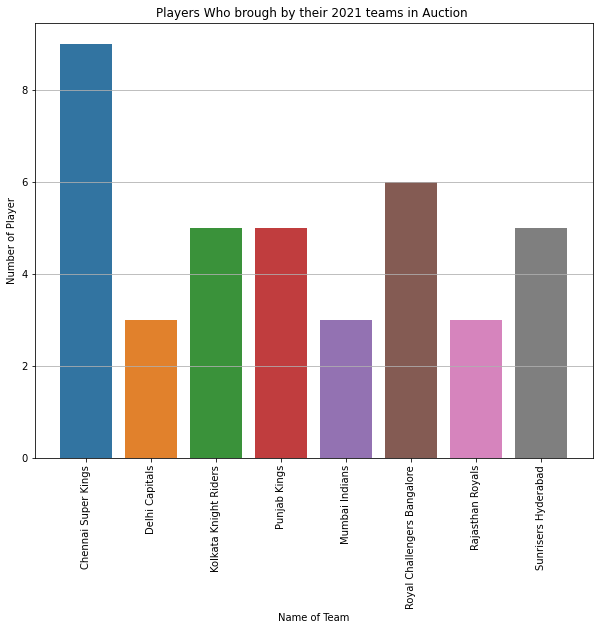

In [46]:
plt.figure(figsize=(10,8))
sns.countplot(same_team['Curr_team'])
plt.title('Players Who brough by their 2021 teams in Auction ')
plt.xlabel('Name of Team')
plt.ylabel('Number of Player')
plt.xticks(rotation = 90)
plt.grid(axis='y')
plt.plot()

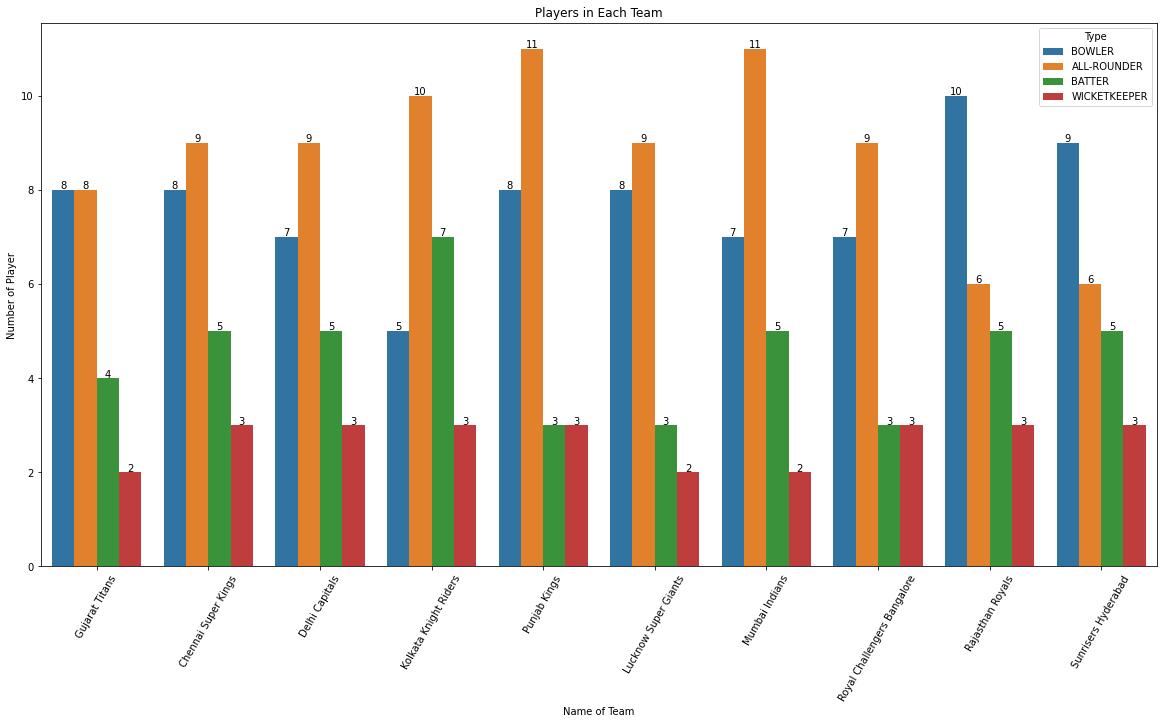

In [47]:
#Number of players in each team based on thier roles


plt.figure(figsize=(20,10))
fig = sns.countplot(ipl[ipl['Curr_team']!='Unsold']['Curr_team'],hue=ipl['Type'])
plt.title('Players in Each Team')
plt.xlabel('Name of Team')
plt.ylabel('Number of Player')


plt.xticks(rotation = 60)

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')

In [48]:
#Highest Bid(successful ) by each team
ipl[ipl['retention']=='In Auction'].groupby(['Curr_team'])['Sold_for_lakh'].max()[:-1].sort_values(ascending = False)

Curr_team
Mumbai Indians                 1525.0
Chennai Super Kings            1400.0
Kolkata Knight Riders          1225.0
Punjab Kings                   1150.0
Delhi Capitals                 1075.0
Royal Challengers Bangalore    1075.0
Sunrisers Hyderabad            1075.0
Gujarat Titans                 1000.0
Lucknow Super Giants           1000.0
Rajasthan Royals               1000.0
Name: Sold_for_lakh, dtype: float64

In [49]:
# Top Five Batsman picked from Auction

ipl[(ipl['retention']=='In Auction') & (ipl['Type']=='BATTER')].sort_values(by='Sold_for_lakh', ascending = False).head(5)


,Player,Base Price,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,Status,retention
71,Shreyas Iyer,2 Cr,BATTER,1225.0,1592.5,Delhi Capitals,Kolkata Knight Riders,Sold,In Auction
193,Shimron Hetmyer,1.5 Cr,BATTER,850.0,1105.0,Delhi Capitals,Rajasthan Royals,Sold,In Auction
217,Rahul Tripathi,40 Lakh,BATTER,850.0,1105.0,Kolkata Knight Riders,Sunrisers Hyderabad,Sold,In Auction
100,Shikhar Dhawan,2 Cr,BATTER,825.0,1072.5,Delhi Capitals,Punjab Kings,Sold,In Auction
195,Devdutt Padikkal,2 Cr,BATTER,775.0,1007.5,Royal Challengers Bangalore,Rajasthan Royals,Sold,In Auction


In [50]:
# Highest Paid Retained player
ipl[ipl['retention']=='Retained'].sort_values(by = 'Sold_for_lakh', ascending = False).head(1)

,Player,Base Price,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,Status,retention
22,Ravindra Jadeja,Retained,ALL-ROUNDER,1600.0,2080.0,Chennai Super Kings,Chennai Super Kings,Sold,Retained


In [51]:
#Amount Spent by each team in Auction
amount_spent = ipl.groupby('Curr_team')['Sold_for_lakh'].sum()[:-1]
amount_spent

Curr_team
Chennai Super Kings            8705.0
Delhi Capitals                 8640.0
Gujarat Titans                 8965.0
Kolkata Knight Riders          8155.0
Lucknow Super Giants           8940.0
Mumbai Indians                 8990.0
Punjab Kings                   8455.0
Rajasthan Royals               8905.0
Royal Challengers Bangalore    8845.0
Sunrisers Hyderabad            8990.0
Name: Sold_for_lakh, dtype: float64

No handles with labels found to put in legend.


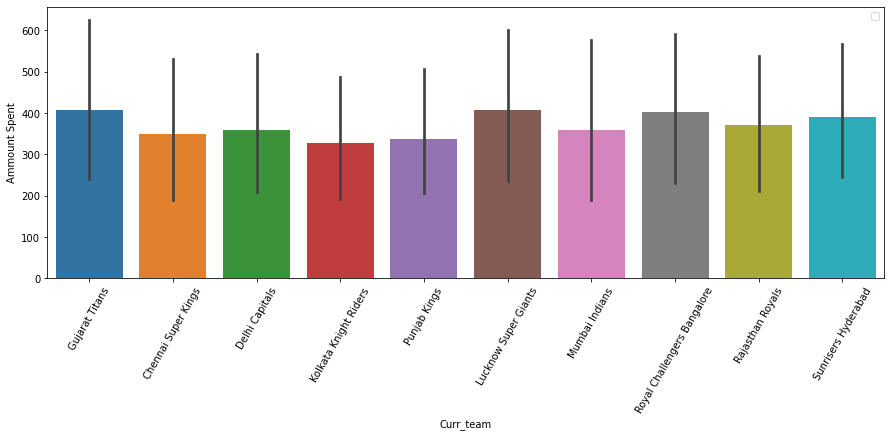

In [52]:
plt.figure(figsize=(15,5))
sns.barplot('Curr_team','Sold_for_lakh', data = ipl[ipl['Curr_team']!='Unsold'])
plt.xticks(rotation=60)
plt.ylabel('Ammount Spent')
plt.legend()

In [53]:
#List of players who Played IPL 2021 but went unsold this time
unsold_stars = ipl[(ipl.Prev_team != 'Not Participated in IPL 2021') & (ipl.Curr_team == 'Unsold')][['Player','Prev_team']]


In [54]:
unsold_stars

,Player,Prev_team
237,Suresh Raina,Chennai Super Kings
238,Steve Smith,Delhi Capitals
239,Shakib Al Hasan,Kolkata Knight Riders
240,Amit Mishra,Delhi Capitals
241,Adil Rashid,Punjab Kings
...,...,...
628,Sairaj Patil,Not Participated
629,Monu Singh,Not Participated
630,Nivethan Radhakrishnan,Not Participated
631,Lance Morris,Not Participated


In [55]:
# Players remained unsold as per their previos teams
unsold_stars.groupby('Prev_team')['Player'].count()

Prev_team
Chennai Super Kings              3
Delhi Capitals                   7
Kolkata Knight Riders            5
Mumbai Indians                   6
Not Participated               356
Punjab Kings                     5
Rajasthan Royals                 3
Royal Challengers Bangalore      7
Sunrisers Hyderabad              4
Name: Player, dtype: int64

# END